<a href="https://colab.research.google.com/github/Acutehu/Acutehu/blob/main/handwriting_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

from tensorflow import keras

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_label) = mnist.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print('Training data: {}, {}'.format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [3]:
print('Test data: {}, {}'.format(test_images.shape, test_label.shape))

Test data: (10000, 28, 28), (10000,)


In [4]:
class_labels = np.unique(train_labels)
print('There are {} clases in the dataset. They are: {}'.format(len(class_labels), class_labels))

There are 10 clases in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


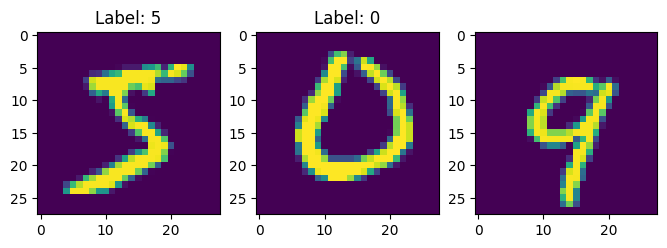

In [5]:
plt.figure(figsize = (8, 6))

plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title('Label: {}'.format(train_labels[0]))

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title('Label: {}'.format(train_labels[2500]))

plt.subplot(1, 3, 3)
plt.imshow(test_images[12])

plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
x_train = train_images[0: 50000]
x_val = train_images[50000 :]

y_train = train_labels[0:50000]
y_val = train_labels[50000:]

new_dimension = np.prod(train_images.shape[1 :])
x_train = x_train.reshape(x_train.shape[0], new_dimension)

x_val = x_val.reshape(x_val.shape[0], new_dimension)

test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [8]:
from tensorflow.keras.utils import to_categorical
no_label = 10

y_train = to_categorical(y_train, no_label)

y_val = to_categorical(y_val, no_label)

y_test = to_categorical(test_label, no_label)

784

In [ ]:
x_train.shape

(50000, 784)

In [9]:
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_label])

In [10]:
def multilayer_perceptron(x, no_classes, first_layer_neurons = 256, second_layer_neurons = 128):
  #first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
  #second layer
  second_weight = tf.Variable(tf.random_uniform([second_layer_neurons, second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_neurons, second_layer_neurons), second_bias))
  #output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits




In [12]:
logits = multilayer_perceptron(X, no_label)

learning_rate = 0.01

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimiser = tf.train.AdamOptimizer(learning_rate= learning_rate)
train_op = optimiser.minimize(loss_op)

init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train)//batch_size

with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict = {X : batch_x, Y: batch_y})
      start +=  batch_size
      end += batch_size

      average_cost += loss/iteration



ValueError: ignored

In [15]:
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential


In [17]:

model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (new_dimension,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(no_label, activation = 'softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 20, batch_size =1)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49998/50000 [============================>.] - ETA: 0s - loss: 0.2606 - acc: 0.9269

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 118s 2ms/sample - loss: 0.2605 - acc: 0.9269 - val_loss: 0.1787 - val_acc: 0.9497
Epoch 2/20
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.1696 - acc: 0.9574 - val_loss: 0.1862 - val_acc: 0.9559
Epoch 3/20
50000/50000 [==============================] - 133s 3ms/sample - loss: 0.1628 - acc: 0.9638 - val_loss: 0.2075 - val_acc: 0.9631
Epoch 4/20
50000/50000 [==============================] - 161s 3ms/sample - loss: 0.1502 - acc: 0.9667 - val_loss: 0.1688 - val_acc: 0.9647
Epoch 5/20
50000/50000 [==============================] - 137s 3ms/sample - loss: 0.1400 - acc: 0.9702 - val_loss: 0.2234 - val_acc: 0.9698
Epoch 6/20
50000/50000 [==============================] - 161s 3ms/sample - loss: 0.1328 - acc: 0.9722 - val_loss: 0.3042 - val_acc: 0.9611
Epoch 7/20
50000/50000 [==============================] - 174s 3ms/sample - loss: 0.1374 - acc: 0.9726 - val_loss: 0.2765 - val_acc: 0.9549
Epoch 8/20
50000/50000 [=======

Text(0.5, 1.0, 'Loss Curves - before regularisation')

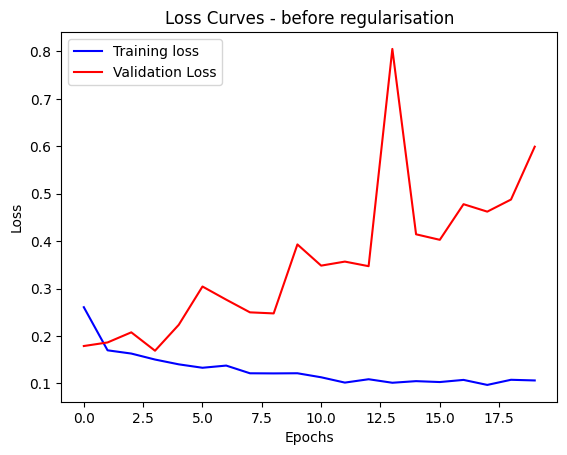

In [19]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.9668 - acc: 0.6917 - val_loss: 0.2947 - val_acc: 0.9177
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 2s 30us/sample - loss: 0.3752 - acc: 0.8880 - val_loss: 0.2012 - val_acc: 0.9422
Epoch 3/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.2836 - acc: 0.9171 - val_loss: 0.1618 - val_acc: 0.9543
Epoch 4/20
50000/50000 [==============================] - 2s 48us/sample - loss: 0.2357 - acc: 0.9310 - val_loss: 0.1346 - val_acc: 0.9615
Epoch 5/20
50000/50000 [==============================] - 2s 48us/sample - loss: 0.2008 - acc: 0.9411 - val_loss: 0.1216 - val_acc: 0.9679
Epoch 6/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.1755 - acc: 0.9492 - val_loss: 0.1104 - val_acc: 0.9691
Epoch 7/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1609 - acc: 0.9524 - val_loss: 0.1037 - val_acc: 0.9694
Epoch 8/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1443 - acc: 0.9591 - val_loss: 0.0952 - val_acc: 0.9720
Epoch 9/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curve - after regularization')

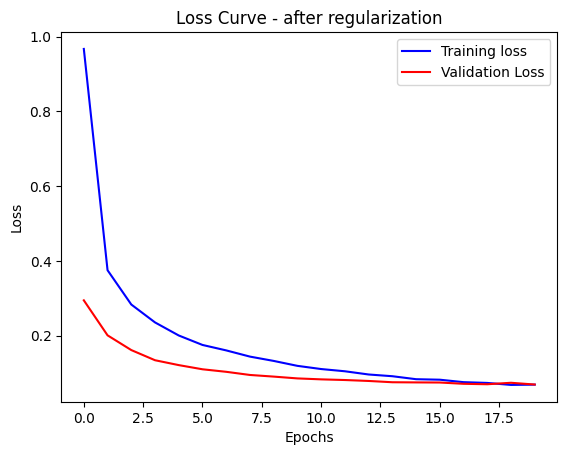

In [21]:
from tensorflow.keras.layers import Dropout

reg_model = Sequential()
reg_model.add(Dense(256, activation = 'relu', input_shape = (new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation = 'relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_label, activation = 'softmax'))

reg_model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_crossentropy,
                  metrics = ['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data =(x_val, y_val),
                            epochs = 20, batch_size = 1000)

test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))


test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))


plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve - after regularization')